# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [100]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = 255*np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [101]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)
    

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(np.log(1+np.abs(If)))


2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

In [102]:
def AfficheImage(I,title):
    plt.figure()
    plt.gray()
    plt.imshow(I)
    plt.title(title)
    plt.show()

In [103]:
def thresholdImage(I,s):
    Img = np.copy(I)
    Img = np.where(Img>=s,255,0)
    return Img

-------------------------------------------------------------------------------------
: le nombre de pixel total de l'image est de ******262144                           :
: le nombre de pixels avec une densité plus grande que 100000 est ******811         :
-------------------------------------------------------------------------------------


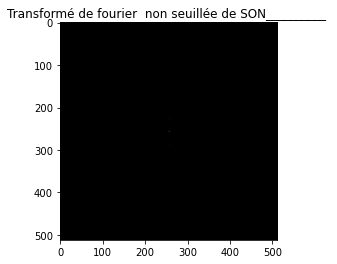

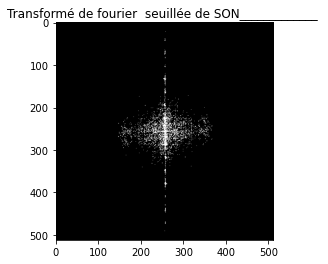

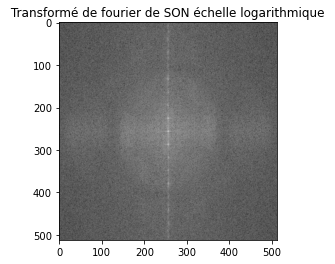

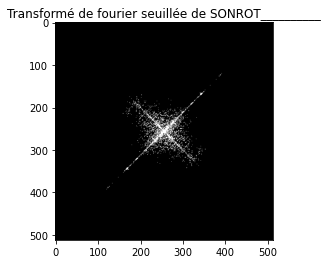

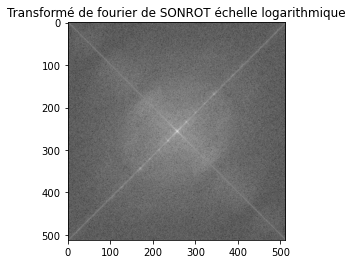

In [154]:
import matplotlib.pyplot as plt
# your code below

sonFT = computeFT(son)
sonrotFT = computeFT(sonrot)

sonVis = toVisualizeFT(sonFT)
sonrotVis = toVisualizeFT(sonrotFT)

sonLogVis =toVisualizeLogFT(sonFT)
sonrotLogVis = toVisualizeLogFT(sonrotFT)
print("-------------------------------------------------------------------------------------")
print(": le nombre de pixel total de l'image est de ******"+str( np.size(sonFT))+"                           :")
print(": le nombre de pixels avec une densité plus grande que 100000 est ******"+str( (sonFT>100000).sum())+"         :")
print("-------------------------------------------------------------------------------------")

AfficheImage(sonVis,"Transformé de fourier  non seuillée de SON__________ ")
AfficheImage(thresholdImage(sonVis,1E5),"Transformé de fourier  seuillée de SON_____________ ")
AfficheImage(sonLogVis ," Transformé de fourier de SON échelle logarithmique ")
AfficheImage(thresholdImage(sonrotVis,1E5),"Transformé de fourier seuillée de SONROT__________" )
AfficheImage(sonrotLogVis,"Transformé de fourier de SONROT échelle logarithmique")

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

    - La tronsformé de fourier fait une rotation tout comme l'image et l'angle de rotation et sa direction sont les memes
       
    - on remarque aussi que dans le cas de sonrot le nombre de pixels avec une tré haute densité et trop petit comparé aux 
        etiend donc on voit une image noir avec un point blanc par contre quand on seil l'image a 100000 l'ecart devient  
        moin grand et on aperçoit donc les pixel clair 

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [105]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1 + (1-alpha)*I2


5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

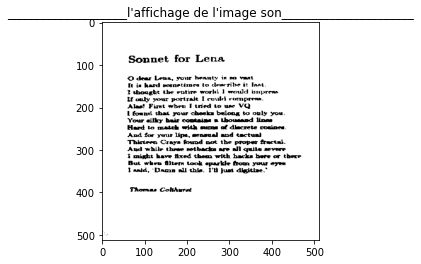

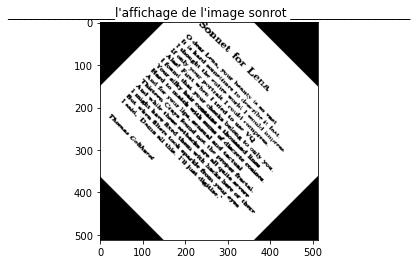

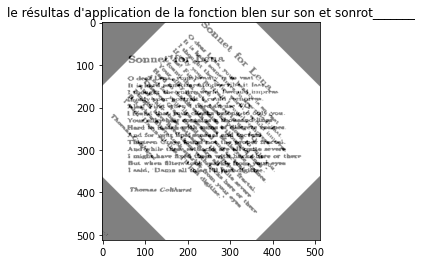

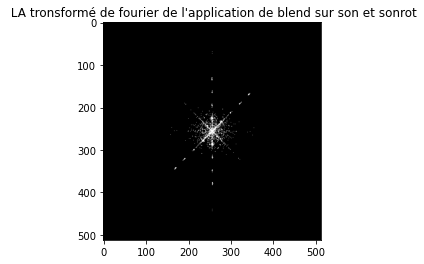

In [106]:
AfficheImage(son,"____________________l'affichage de l'image son______________________")
AfficheImage(sonrot,"__________________l'affichage de l'image sonrot ____________________")


sonb = blend(son,sonrot,0.5)
AfficheImage(sonb,"le résultas d'application de la fonction blen sur son et sonrot_______")



#transformée de Fourier seuillée
sonbf = computeFT(sonb)
sonbf = toVisualizeFT(sonbf)
sonbft = thresholdImage(sonbf,1E5)
AfficheImage(sonbft," LA tronsformé de fourier de l'application de blend sur son et sonrot")

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

      La nouvelle image est une combinaison linéaire de deux fichiers source, F = G + H, avec un simple vecteur de poids
      (alpha, (1 - alpha)). Par conséquent, la nouvelle transformée de Fourier est également une combinaison linéaire des 
      deux transformées source: FT (F) = alpha FT (G) + (1 -alpha) FT (H). Le spectre affiché est son module, donc la même
      règle s'applique: les spectres initiaux sont additionnés.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [107]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below



In [108]:
def rectifyOrientation(I) :
    Img = np.copy(I)
    Img = thresholdImage(toVisualizeFT(computeFT(Img)),3E5)
    
    Iori, degree = mainOrientation(Img)
    print(degree)
    return rotateImage(I,-degree)

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

In [109]:
def testRotation(I,d):
    print("affichage de l'image aprés rotation de "+str(d)+"***SANS*** application de rectifyOrientation-------------------")
    Ir = rotateImage(I,d)
    AfficheImage(Ir,"Image sans rectifyOrientation")
    print("affichage de l'image aprés rotation de "+str(d)+"***ACEC*** application de rectifyOrientation-------------------")
    Ir = rectifyOrientation(Ir)
    AfficheImage(Ir,"Image avec rectifyOrientation")

-45.0


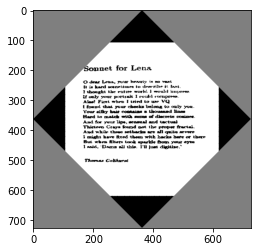

In [115]:
racine = rectifyOrientation(sonrot)
AfficheImage(racine,"")

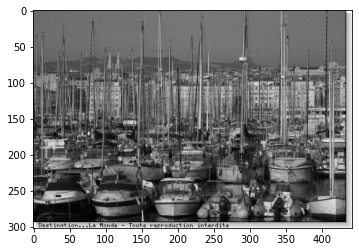

affichage de l'image aprés rotation de 180***SANS*** application de rectifyOrientation-------------------


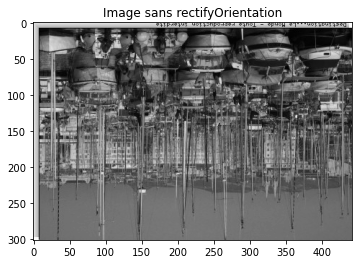

affichage de l'image aprés rotation de 180***ACEC*** application de rectifyOrientation-------------------
0.0


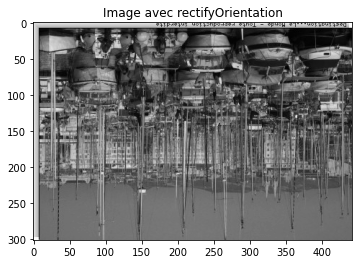

affichage de l'image aprés rotation de 90***SANS*** application de rectifyOrientation-------------------


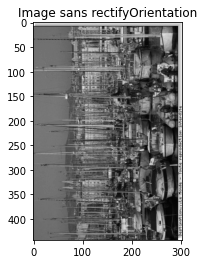

affichage de l'image aprés rotation de 90***ACEC*** application de rectifyOrientation-------------------
84.375


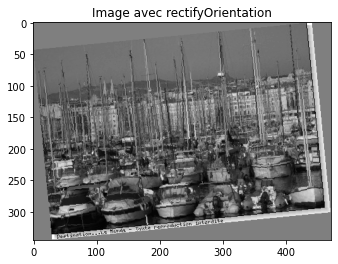

In [117]:
port = np.array(Image.open('img/port.jpg'))
AfficheImage(port,"")

testRotation(port,180)
testRotation(port,90)